In [1]:
# ROC (Reciever Operator Characteristic) and AUC (Area Under Curve) are used to determine which ml model can be used 
# the best to test the data.

In [2]:
# ROC uses confusion matrix and plots the graph between Sensitivity on the y-axis and (1-specificity) on the x-axis.

In [3]:
# Sensitivity : True Positive Rate (Must be high)
# (1-specificity) : False Positive Rate (Must be low)

In [4]:
from IPython.display import Image

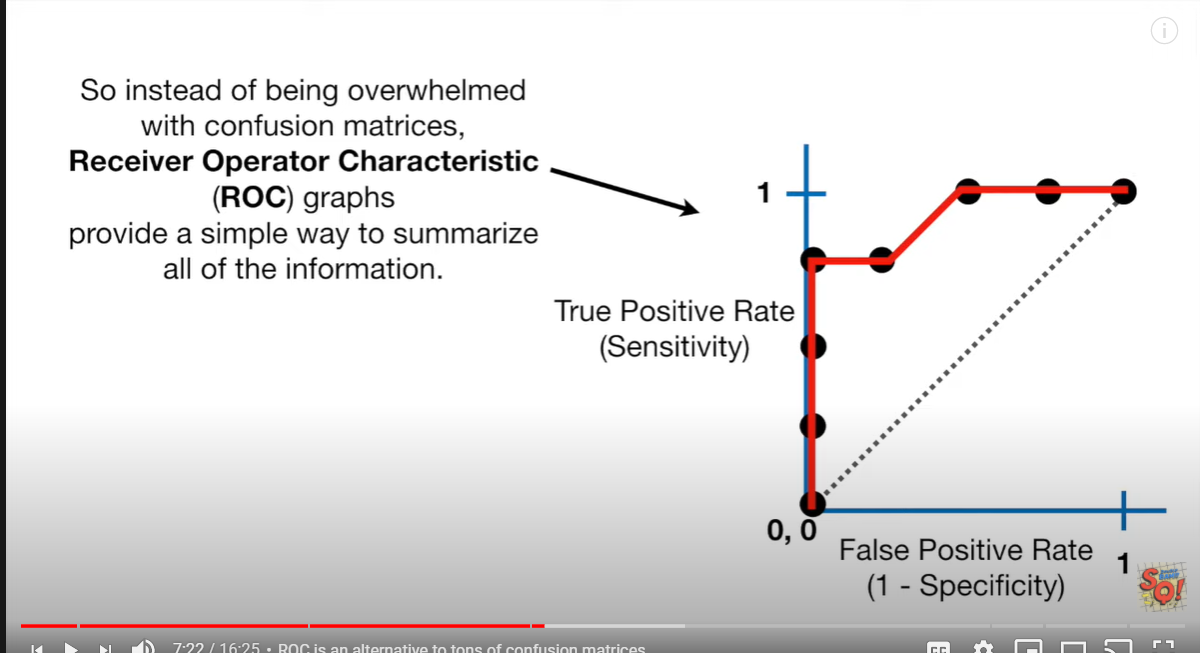

In [6]:
# Instead of changing parameters always like the treshold in logistic regression, we can use ROC to find the best parameters
# for the model (treshold).
Image(filename="defination.png",width=500)

In [7]:
# True Positive Rate= (Predicted to be positive and is actually positive)/
#                  [(Predicted to be positive and is actually positive)+(Predicted to be negative and is actually positive)]
# i.e., the percentage of (Predicted to be positive and is actually positive) is true positive rate.

In [10]:
# False positive rate= (Predicted to be positive and is actually negative)/
#                  [(Predicted to be positive and is actually negative)+(Predicted to be negative and is actually negative)]
# i.e., the percentage of (Predicted to be positive and is actually negative) is false positive rate.
# The false positive rate tells us the proportion of actual negatives that were incorrectly classified.

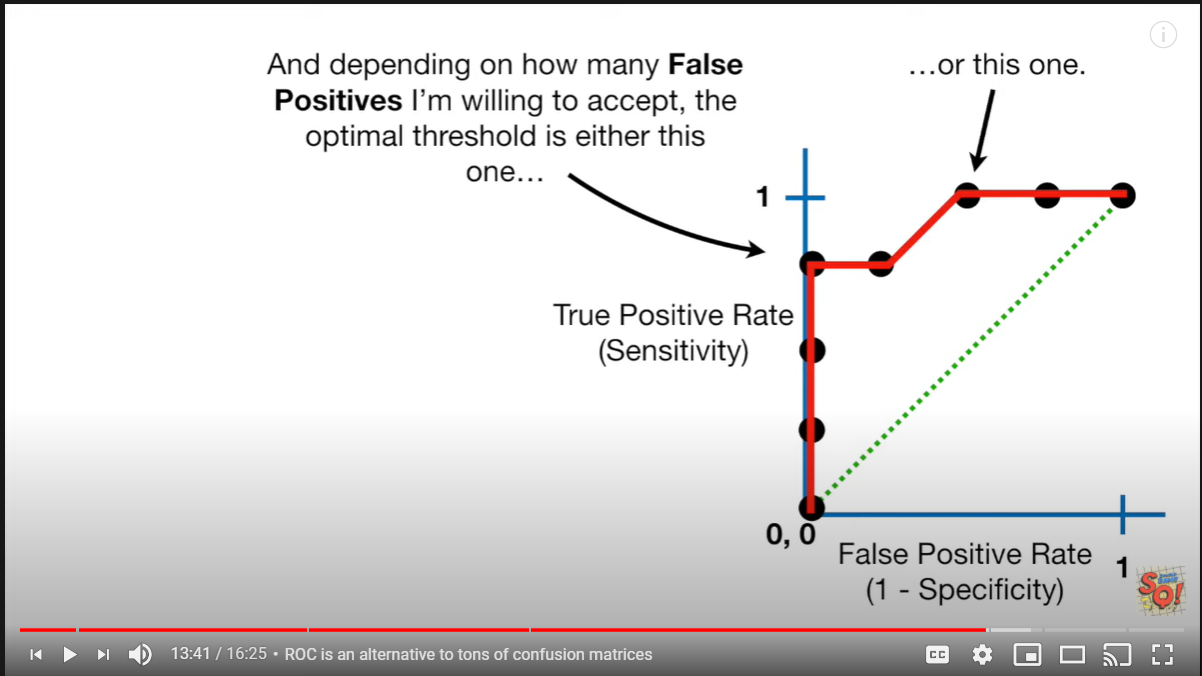

In [11]:
Image(filename="roc.png",width=500)

In [13]:
# The area under this curve is called the AUC. AUC allows you to compare different ROC curves.

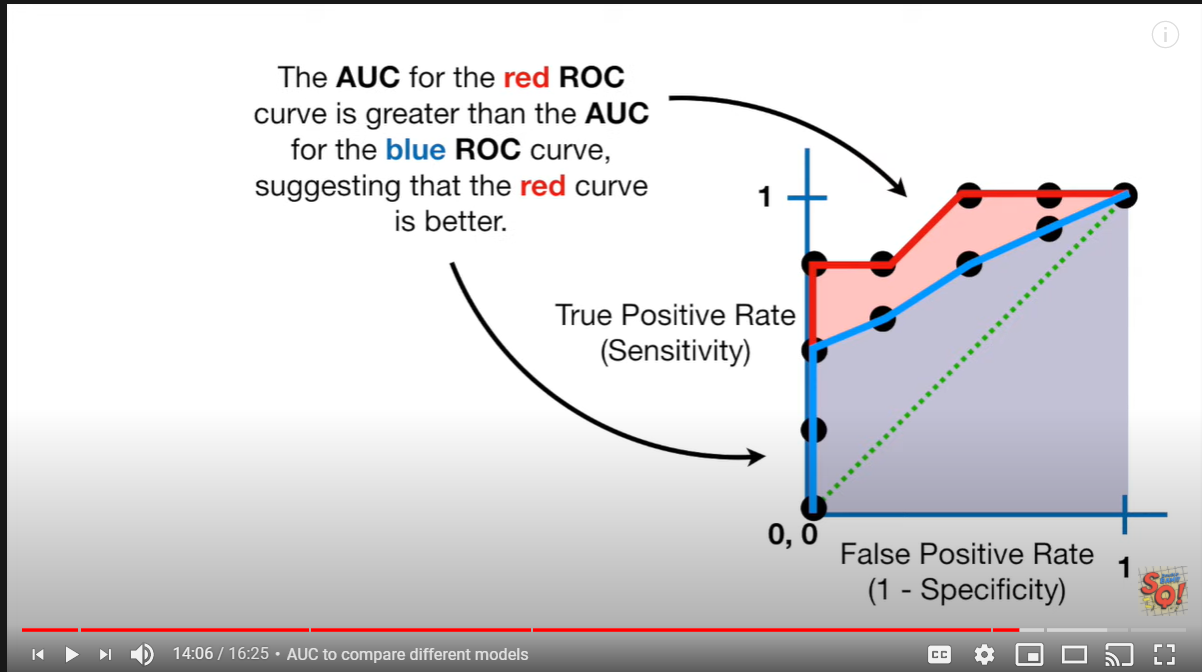

In [14]:
Image(filename="auc.png",width=500)

In [15]:
# So if the red ROC curve represents the logistic regression and the blue ROC curve represents the random forest,
# you would use the logistic regression.

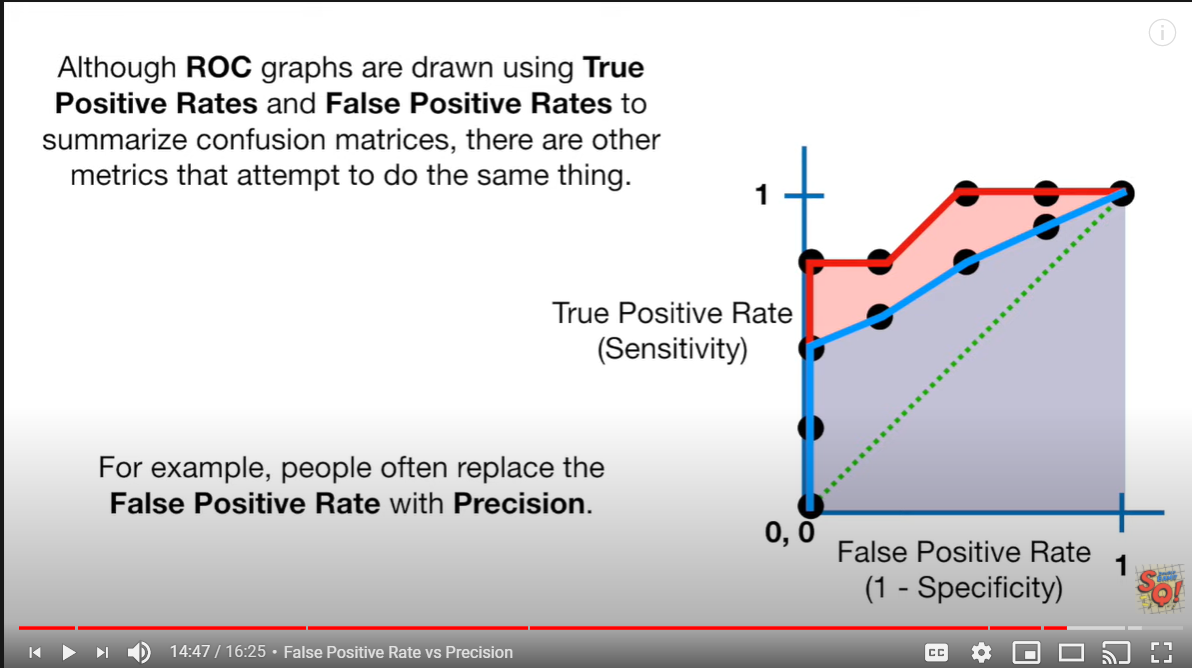

In [16]:
# Note:
Image(filename="note.png",width=500)

In [17]:
# Precision= (Predicted to be positive and is actually positive)/
#            [(Predicted to be positive and is actually positive)+(Predicted to be positive and is actually negative)]

In [18]:
# Precision is the proportion of positive results that were correctly classified.

In [19]:
# So if the confusion matrix contains large no. of negatives than the positives (actual), then we would use precision
# since precision's formula does not depend on (predicted to be negative and is actually negative)

In [20]:
# In practice, we can use precision while dealing with a rare disease dataset, since the disease wouldn't have effected
# large population and resulting in high number of (predicted negative and actual negative).

In [21]:
import pandas as pd

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
data=load_breast_cancer()

In [24]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
X=data.data
y=data.target

In [26]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [29]:
# Now we split the data into train and test
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [32]:
# Now we are using Logistic Regression to train our model. Note that logistic regression is based on the probability of
# dependent variable (i.e., the curve in logistic regression is the probability of finding a target depending on its feature).

In [33]:
# Logistic regression uses sigmoid function and hence its value lies between 0 and 1 (i.e., y-axis/probability).

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
# We set a treshold for logistic regression such that above that treshold the predicted value comes under one class
# and below that value, the predicted value comes to another class. Hence, Logistic regression is used in Classification.

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

C:\Users\91830\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
y_pred=lr.predict(X_test)

In [49]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0])

In [50]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])

In [51]:
# Now we draw a confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [56]:
# Using the confusion matrix from sklearn has the columns to be as predicted values and the rows as actual values.

In [68]:
confusion_matrix(y_test, y_pred)

array([[44,  4],
       [ 0, 66]], dtype=int64)

In [58]:
import seaborn as sns

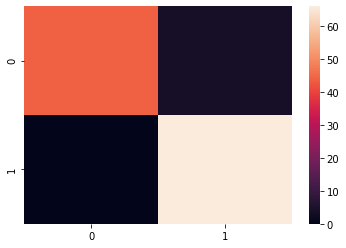

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred),)

In [62]:
# You can use heatmap or construct a dataframe out of it

In [63]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [71]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted Benign', "Predicted Malignant"],index=['Actual Benign', 'Actual Malignant'])

,Predicted Benign,Predicted Malignant
Actual Benign,44,4
Actual Malignant,0,66


In [72]:
# You can use the roc_auc_score() to determine the performance of the model. If the score is closer to one, then the model
# can perform well. If the score lies in between 0.5 then the model turns out to be like a coin flip.

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score(y_test,y_pred)

0.9583333333333333

In [75]:
# Since the score is near 95%, we can deploy this model.

In [76]:
lr.score(X_test,y_test)

0.9649122807017544